In [81]:
# Import libraries to be used 
from bs4 import BeautifulSoup
import requests
import csv
import re 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# The url website that has the table we want to normalize  
url = "https://en.wikipedia.org/wiki/Road_safety_in_Europe"

# Make a GET request to fetch the raw HTML content
html_content = requests.get(url).text

# In order to be able to extract data from the html content, we have to use the library BeatifulSoup
soup_content = BeautifulSoup(html_content)

# Use the results given by beautifulsoup and extract the htlm table, Lucky for us the first table within class wikitable was the one we were looking for
table = soup_content.find("table", attrs={"class": "wikitable"})
table_data = table.tbody.find_all("tr") 

# Get the headings of the table by looping through the th elements of the html table and save them in an array
headings = []
for td in table_data[0].find_all("th"):
    
# Use some regex to remove unnecessary characters in each heading before saving it in the array
    td = td.text.replace('\n', ' ').strip()
    td = re.sub("[\(\[].*?[\)\]]", "", td)
    td = re.sub('[0-9]', '', td)
    td = re.sub('in', '', td)
    headings.append(td)

# Loop through the content of rows in the same table from Beautifulsoup and save the text content of each of them in the array but zip them along with the corresponding header
data = []
for tr in table.tbody.find_all("tr"):
    t_row = {}
    
    for td, th in zip(tr.find_all("td"), headings): 
        t_row[th] = td.text.replace('\n', '').strip()
    data.append(t_row)
    
# convert array of data into dataframe
df_data = pd.DataFrame(data)

#remove the rows that have NAN values
df_data = df_data.dropna() 

# Add the year row with 2018 as the year
df_data["Year"] = 2018

# delete the last row of totals before sorting the dataframe
df_data = df_data.iloc[:-1 , :]

# Save the data in a new variable 
df_new = df_data


In [82]:
# Make some cleaning in the columns data from each column before saving the data in CSV or ploting


df_new['GDP per capita'] = [gdp.replace(",","") for gdp in df_new['GDP per capita  '] ]
df_new['GDP per capita'][4] = '11500'

df_new['Vehicle ownership'] = df_new['Vehicle ownership   '].astype('float')
vehicle_own = df_new['Vehicle ownership']

df_new['Country'] = df_new['Country'].astype('string')

df_new['Population'] = [gdp.replace(",","") for gdp in df_new['Population  '] ]
df_new['Population'][11] = '82792351'

df_new['Country'] = df_new['Country'].astype('string')

df_new['Area'] = df_new['Area '].astype('float')

df_new['Population density'] = [density.replace(",","") for density in df_new['Population density   ']]
df_new['Population density'] = df_new['Population density'].astype('float')

df_new['Total Road Deaths'] = [total.replace(",","") for total in df_new['Total Road Deaths  ']]
df_new['Total Road Deaths'] = df_new['Total Road Deaths'].astype('float')

df_new['Road deaths per Million Inhabitants'] = [million.replace(",","") for million in df_new['Road deaths per Million Inhabitants  ']]
df_new['Road deaths per Million Inhabitants'] = df_new['Road deaths per Million Inhabitants'].astype('float')


GDP = df_new['GDP per capita'].astype('float')
countries = df_new['Country']
population =  df_new['Population'].astype('float')
area = df_new['Area']
pop_density = df_new['Population density']
tot_road_death = df_new['Total Road Deaths']
roads_death_per_million = df_new['Road deaths per Million Inhabitants']


<ipython-input-82-526c59f94aac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['GDP per capita'][4] = '11500'
<ipython-input-82-526c59f94aac>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Population'][11] = '82792351'


In [83]:
df_data.to_csv("unsortedresults.csv")

# Sort the data by “Road deaths per Million Inhabitants"
df_data = df_data.sort_values('Road deaths per Million Inhabitants  ')

# reoder the columns of the dataframe
df_data = df_data[['Country', 'Year', 'Area ', 'Population  ', 'GDP per capita  ', 'Population density   ', 'Vehicle ownership   ', 'Total Road Deaths  ', 'Road deaths per Million Inhabitants  ']]
# save the dataframe as a csv file
df_data.to_csv("results.csv")


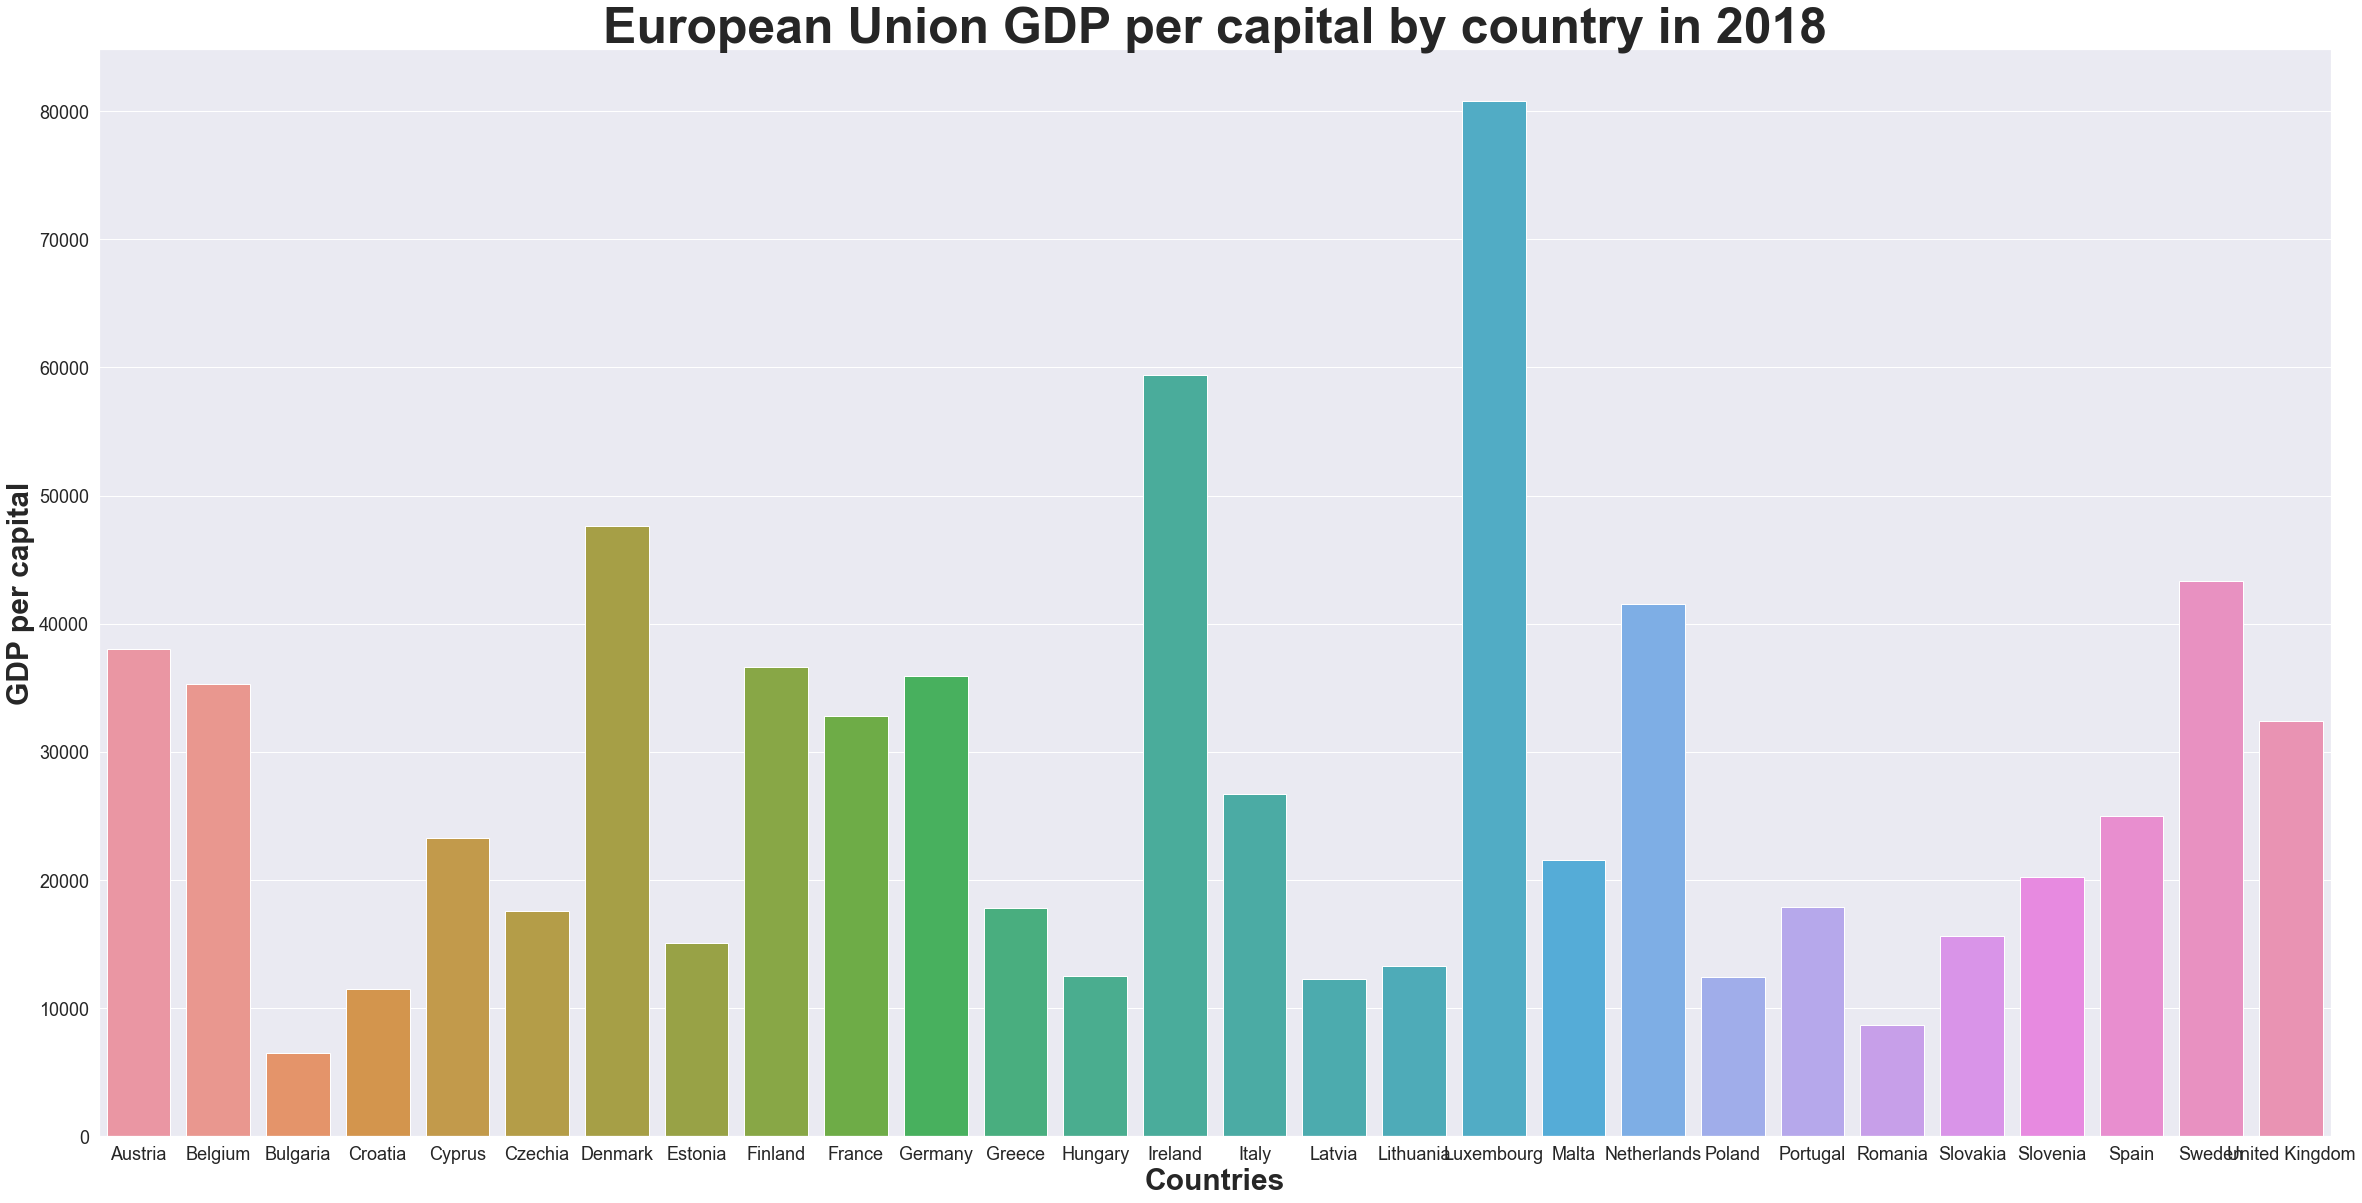

In [84]:
# Plot GDP per capital by country using the function of seaborn called barplot, pass country as the x axis variable and the GDP per capital as the y axis,
# the rest are specifications of the figure. 
sns.set(rc={'figure.figsize':(40,20)})
b = sns.barplot(x=df_new['Country'].astype('string'),y=GDP,data=df_new, label='big')
b.axes.set_title("European Union GDP per capital by country in 2018",fontsize=50, fontweight="bold")
b.set_xlabel("Countries",fontsize=30, fontweight="bold")
b.set_ylabel("GDP per capital",fontsize=30, fontweight="bold")
b.tick_params(labelsize=18)


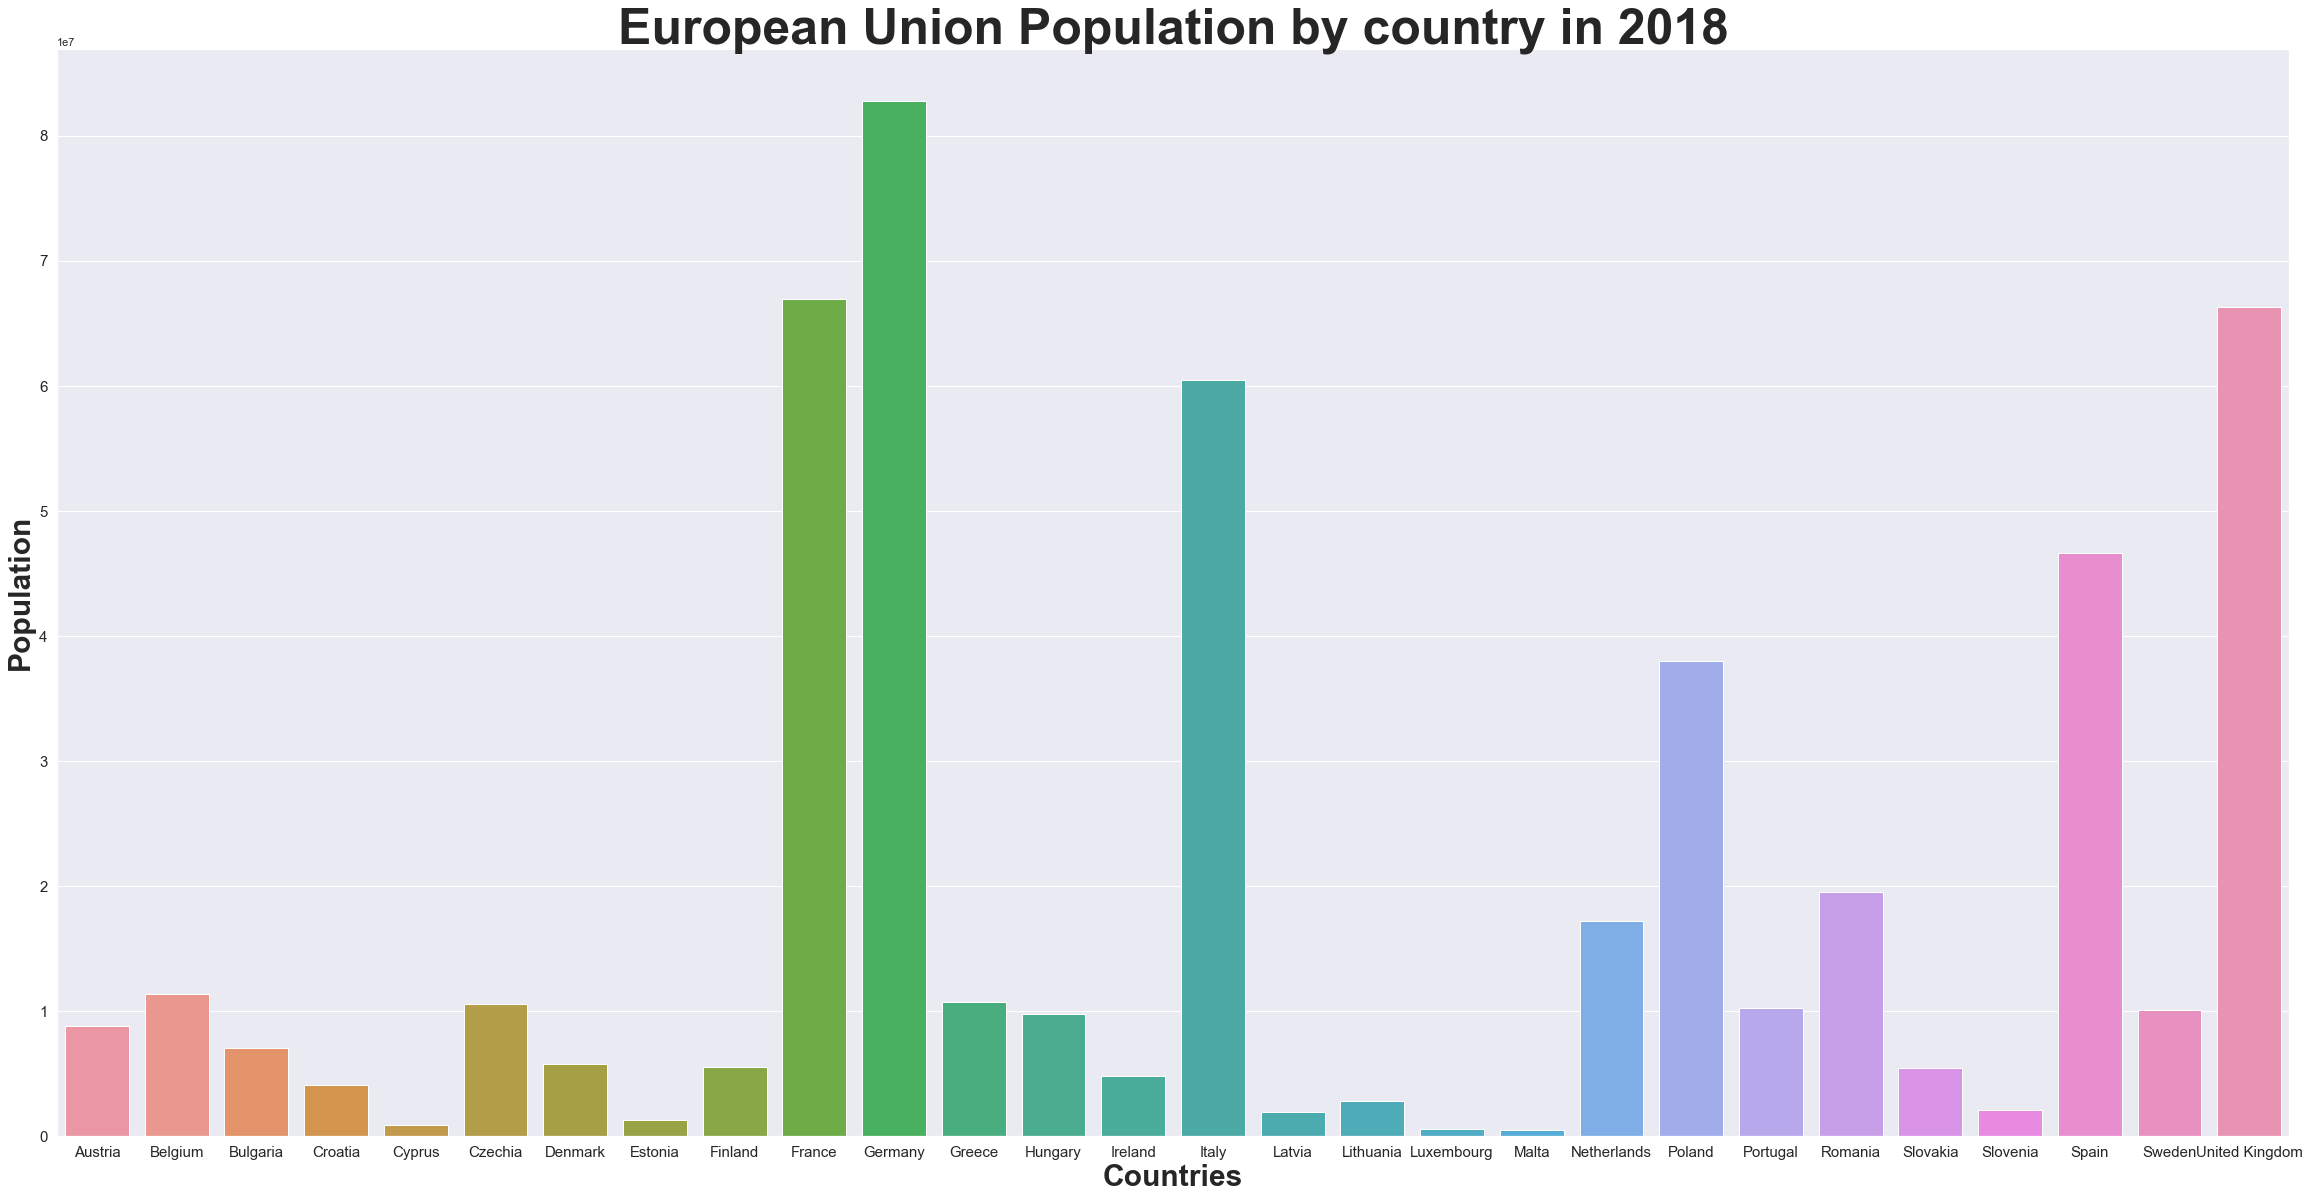

In [85]:
#  Plot Population for each country using the function of seaborn called barplot, pass country as the x axis 
# variable and the population as the y axis

b = sns.barplot(x=df_new['Country'].astype('string'),y=population,data=df_new, label='big')
sns.set(rc={'figure.figsize':(30,10)})
b.axes.set_title("European Union Population by country in 2018",fontsize=50, fontweight="bold")
b.set_xlabel("Countries",fontsize=30, fontweight="bold")
b.set_ylabel("Population",fontsize=30, fontweight="bold")
b.tick_params(labelsize=15)



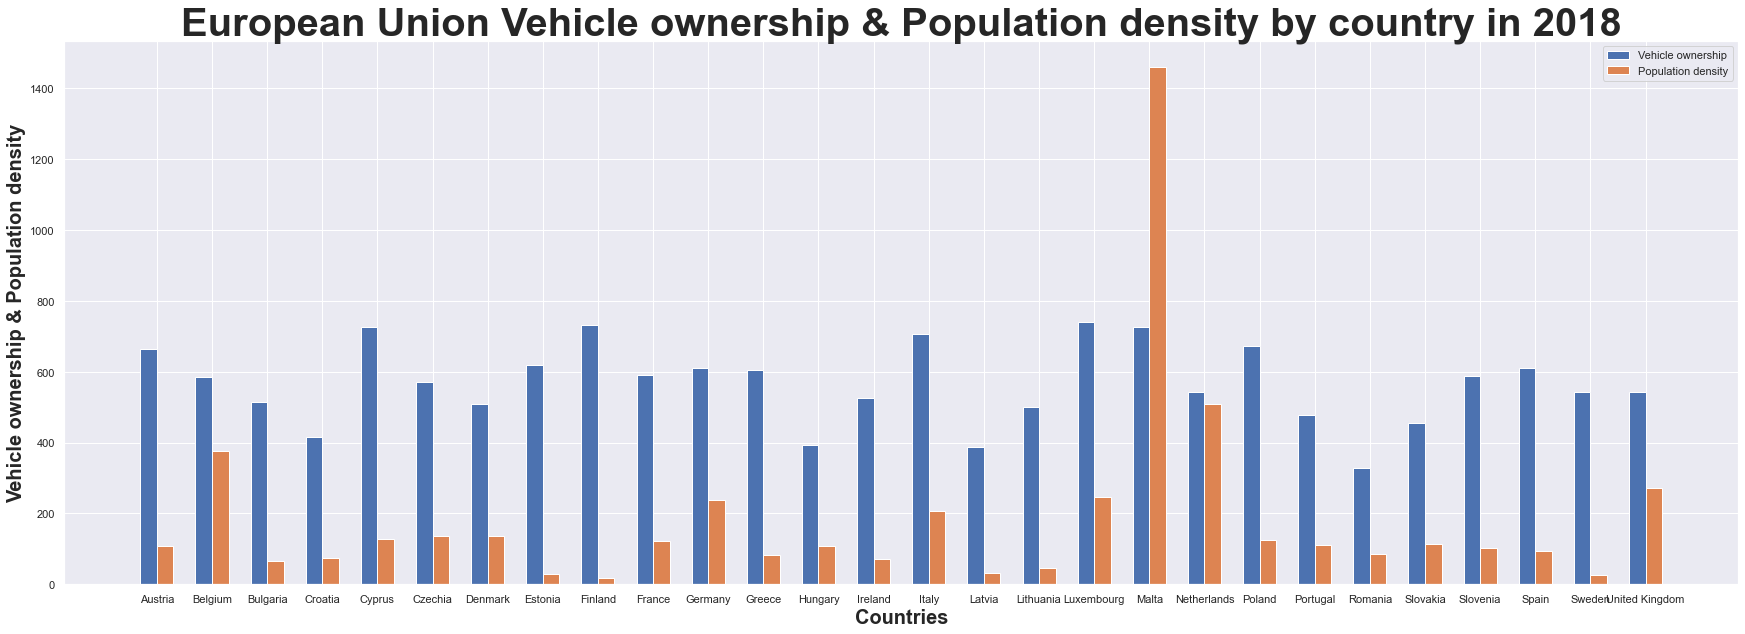

In [89]:
# number of rows
N = 28

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(30,10))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, vehicle_own, width, label='Vehicle ownership')
plt.bar(ind + width, pop_density, width, label='Population density')


plt.xlabel('Countries', fontsize=20, fontweight="bold")
plt.ylabel('Vehicle ownership & Population density', fontsize=20, fontweight="bold")
plt.title('European Union Vehicle ownership & Population density by country in 2018', fontsize=40, fontweight="bold")

# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, countries)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

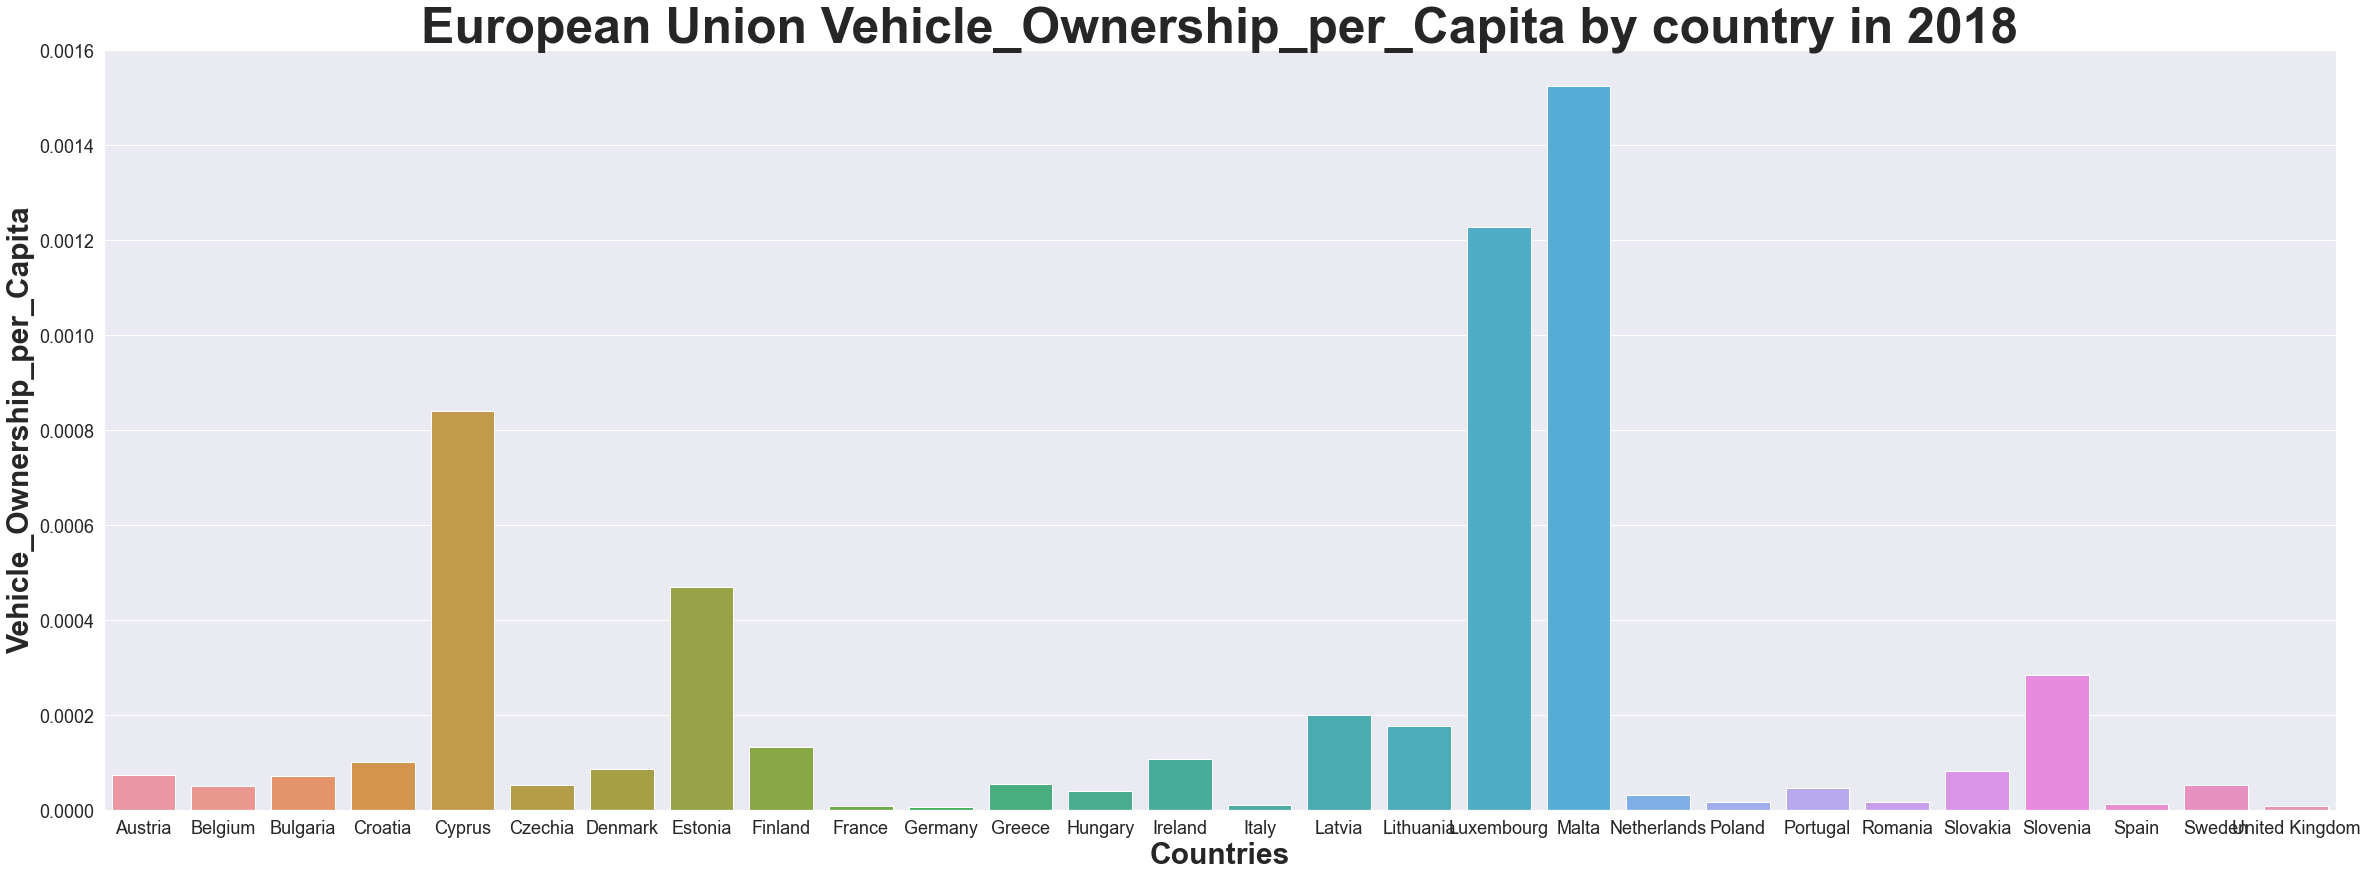

In [87]:
N = 28
# creating the ration of vehicle ownership vith respect to the population
df_new["Vehicle_Ownership_per_Capita"] = vehicle_own / population

# Save it in a new variable 
vehicle_per_capita = df_new["Vehicle_Ownership_per_Capita"]

# plot it using the function of seaborn called barplot, pass country as the x axis variable and the ratio as the y axis, 
# the rest are specifications of the figure. One thing to note has the same information as the previous one it is just that it 
# combined the information in one ratio
b = sns.barplot(x=df_new['Country'].astype('string'),y=vehicle_per_capita,data=df_new, label='big')
sns.set(rc={'figure.figsize':(40,13)})
b.axes.set_title("European Union Vehicle_Ownership_per_Capita by country in 2018",fontsize=50, fontweight="bold")
b.set_xlabel("Countries",fontsize=30, fontweight="bold")
b.set_ylabel("Vehicle_Ownership_per_Capita",fontsize=30, fontweight="bold")
b.tick_params(labelsize=18)


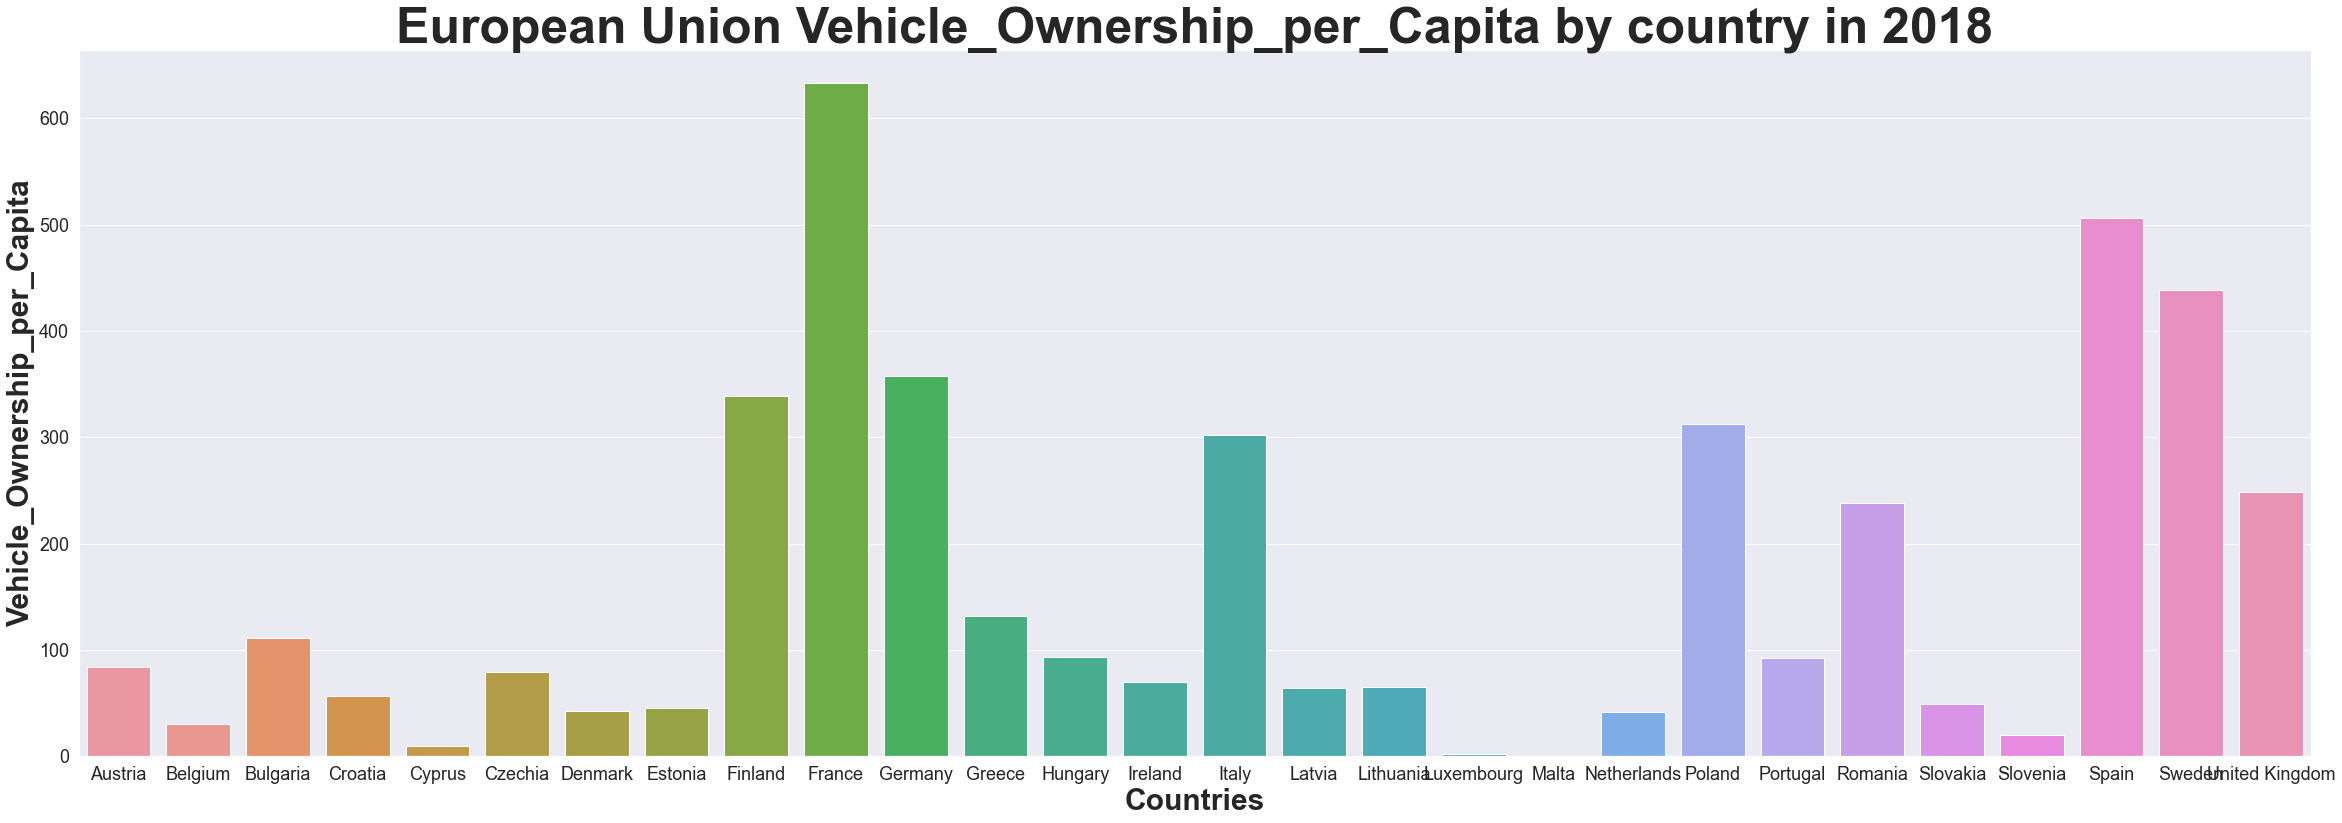

In [90]:
b = sns.barplot(x=df_new['Country'].astype('string'),y=area,data=df_new, label='big')
sns.set(rc={'figure.figsize':(40,13)})
b.axes.set_title("European Union Vehicle_Ownership_per_Capita by country in 2018",fontsize=50, fontweight="bold")
b.set_xlabel("Countries",fontsize=30, fontweight="bold")
b.set_ylabel("Vehicle_Ownership_per_Capita",fontsize=30, fontweight="bold")
b.tick_params(labelsize=18)